<a href="https://colab.research.google.com/github/kaique-barros/Estudos-de-machine-learnig/blob/main/Analise_e_tratamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [188]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import plotly.express as px

# Carregamento dos dados

O dataset é um conjunto de dados sobre a ficha médica dos pacientes e se ele sofreu um ataque cardíaco.

In [189]:
dados = pd.read_csv('heart.csv', sep=',', encoding='iso-8859-1')

# Exploração de dados

In [190]:
dados.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [191]:
dados.shape

(918, 12)

## Análise das variáveis

### Análise por idade

In [192]:
dados['Age'].value_counts().head()

,count
Age,
54,51
58,42
55,41
56,38
57,38


In [193]:
dados['Age'].value_counts().sort_index().head()

,count
Age,
28,1
29,3
30,1
31,2
32,5


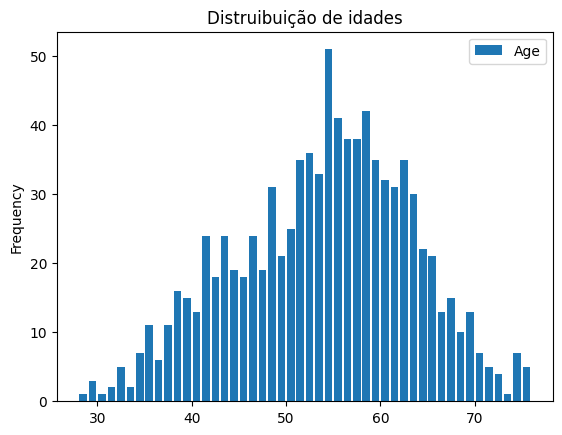

In [194]:
dados.plot(y='Age', kind='hist', title='Distruibuição de idades', bins=np.arange(28, 77, 1), rwidth=0.8);

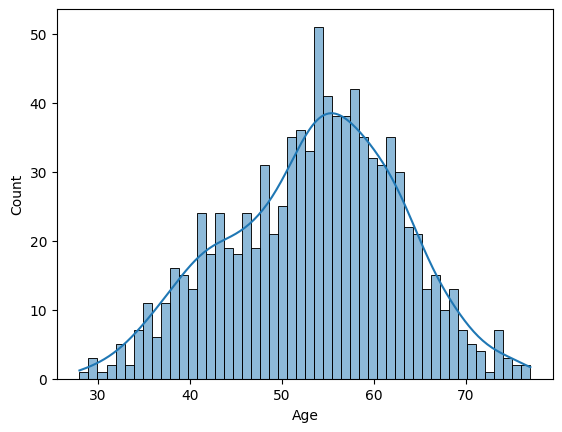

In [195]:
sns.histplot(dados, x='Age', bins=50, kde=True, stat='count');

### Análise por sexo

In [196]:
dados['Sex'].value_counts()

,count
Sex,
M,725
F,193


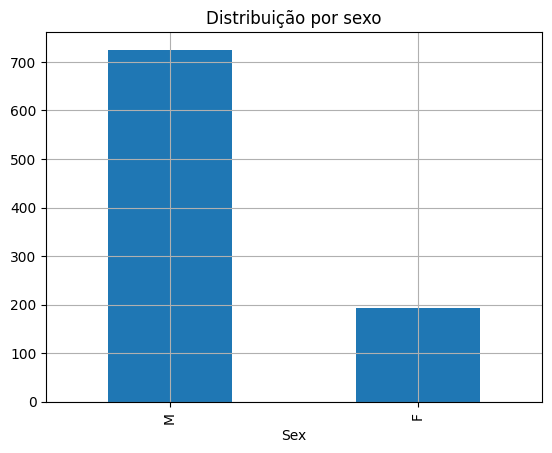

In [197]:
dados['Sex'].value_counts().plot(kind='bar', title='Distribuição por sexo', grid=True);

### Análise por tipo de dor no peito

In [236]:
dados['ChestPainType'].value_counts()

,count
ChestPainType,
ASY,496
NAP,202
ATA,173
TA,46


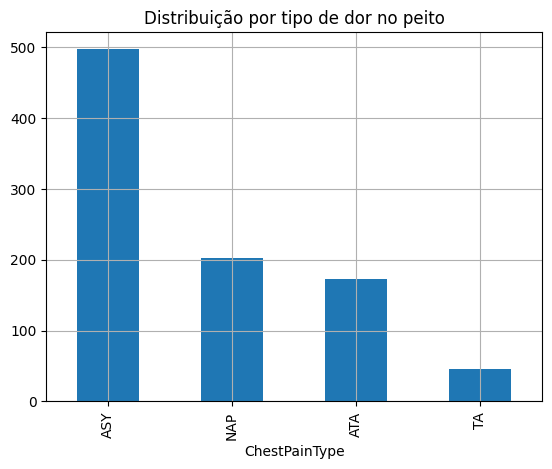

In [237]:
dados['ChestPainType'].value_counts().plot(kind='bar', title='Distribuição por tipo de dor no peito', grid=True);

### Análise da pressão sanguínea (em repouso)

In [238]:
dados['RestingBP'].value_counts().sort_index().head()

,count
RestingBP,
80,1
92,1
94,2
95,6
96,1


In [239]:
dados['RestingBP'].value_counts().sort_index()

,count
RestingBP,
80,1
92,1
94,2
95,6
96,1
...,...
180,12
185,1
190,2


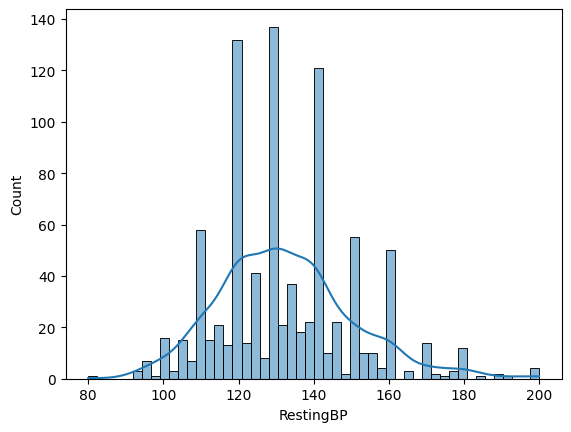

In [240]:
sns.histplot(dados, x='RestingBP', bins=50, kde=True, stat='count');

### Análise por colesterol

In [241]:
dados['Cholesterol'].value_counts().sort_index()

,count
Cholesterol,
85.0,1
100.0,2
110.0,1
113.0,1
117.0,1
...,...
491.0,1
518.0,1
529.0,1


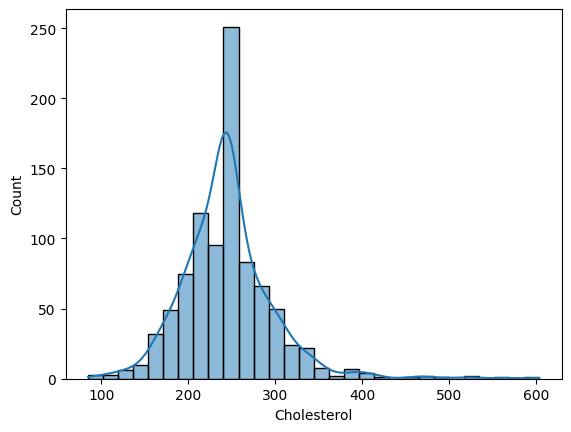

In [242]:
sns.histplot(dados, x='Cholesterol', bins=30, kde=True, stat='count');

### Análise do Açúcar no sangue (em jejum)

In [243]:
dados['FastingBS'].value_counts().sort_index()
# 0 = Não diabético (<120ml/dl)
# 1 = Diabético (>=120ml/dl)

,count
FastingBS,
0,703
1,214


<Axes: xlabel='FastingBS'>

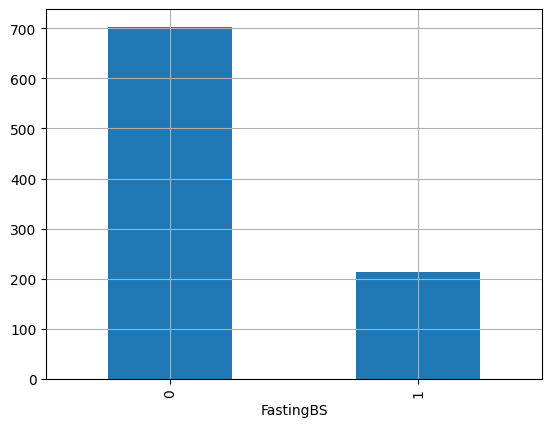

In [244]:
dados['FastingBS'].value_counts().sort_index().plot(kind='bar', grid='true')

### Análise por eletrocardiograma em repouso

In [245]:
dados.RestingECG.value_counts()

,count
RestingECG,
Normal,551
LVH,188
ST,178


Normal: normal 👍

LVH: Hipertrofia ventricular à esquerda

ST: Anormalidade na onda ST-T

<Axes: xlabel='RestingECG', ylabel='count'>

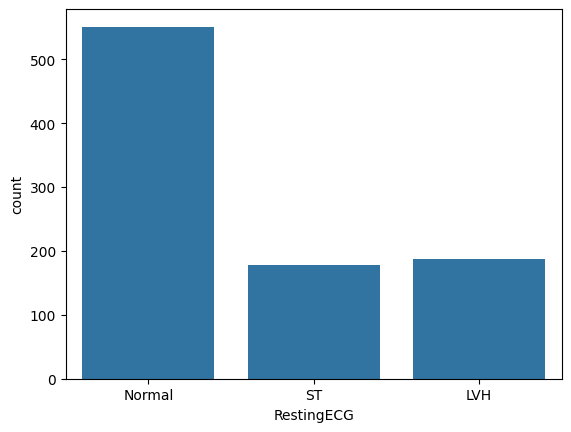

In [246]:
sns.countplot(x='RestingECG', data=dados)

### Análise pro frequência cardiáca máxima

In [247]:
dados.MaxHR.value_counts().sort_index()

,count
MaxHR,
60,1
63,1
67,1
69,1
70,1
...,...
190,2
192,1
194,1


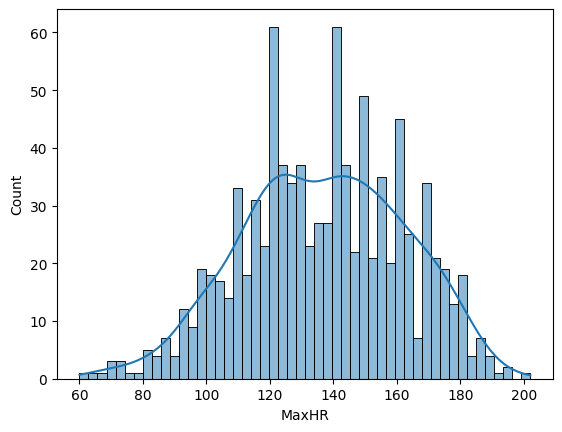

In [248]:
sns.histplot(dados, x='MaxHR', bins=50, kde=True, stat='count');

### Análise por Angina induzida por exercicio

In [249]:
dados.ExerciseAngina.value_counts()

,count
ExerciseAngina,
N,546
Y,371


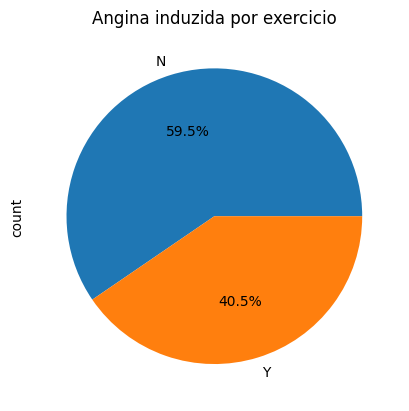

In [250]:
dados.ExerciseAngina.value_counts().plot(kind='pie', title='Angina induzida por exercicio', autopct='%1.1f%%');

### Análise depressão de ST induzida por exercicio em relação ao repouso

In [251]:
dados['Oldpeak'].value_counts().sort_index().head()

,count
Oldpeak,
-2.6,1
-2.0,1
-1.5,1
-1.1,1
-1.0,2


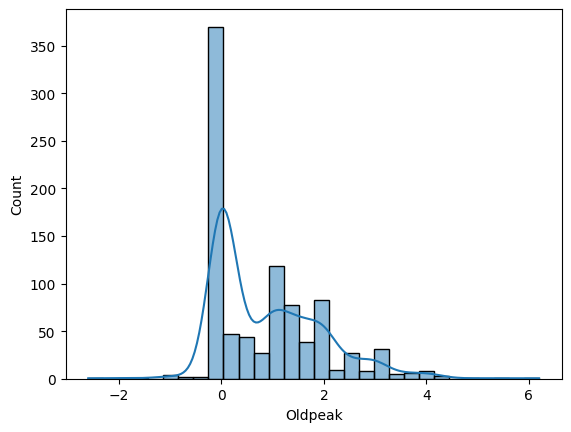

In [252]:
sns.histplot(dados, x='Oldpeak', bins=30, kde=True, stat='count');

### Análise inclinação do segmento ST no ECG

In [253]:
dados['ST_Slope'].value_counts()

,count
ST_Slope,
Flat,459
Up,395
Down,63


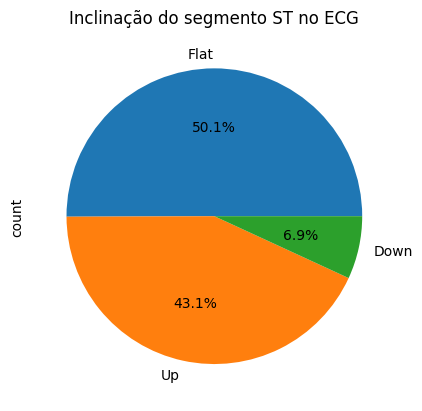

In [254]:
dados['ST_Slope'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Inclinação do segmento ST no ECG');

### Análise Doença cardíaca

In [255]:
dados['HeartDisease'].value_counts()

,count
HeartDisease,
1,507
0,410


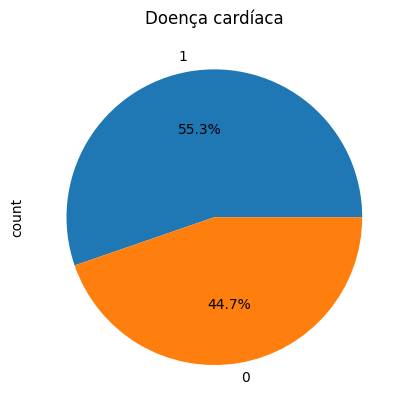

In [256]:
dados['HeartDisease'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Doença cardíaca');

# Tratamento de dados

In [219]:
dados.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


## Valores faltantes

In [220]:
dados.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [221]:
#Para exluir casa existam valores NA
dados_semna = dados.dropna()
dados.shape

(918, 12)

In [222]:
#Para substituir o dado faltante pela média, caso existam
dados.fillna({'Age': dados['Age'].mean()}, inplace=True)

## Análises estatísticas descritivas

In [223]:
dados.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [224]:
dados.mode()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,M,ASY,120,0,0,Normal,150,N,0.0,Flat,1


### Tratando valores incoerentes

In [225]:
dados2 = dados.loc[dados.RestingBP != 0]
dados2.shape

(917, 12)

In [226]:
dados3 = dados2.loc[dados2.Cholesterol != 0]
dados3.shape
# A perda é muito grande para a base de dados, por isso é melhor substituir

(746, 12)

In [227]:
dados3 = dados2.copy()
dados3['Cholesterol'] = dados3['Cholesterol'].replace(0, np.nan)
dados3.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,746.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,244.635389,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,59.153524,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,207.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,275.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [228]:
dados3.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,171
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [229]:
dados3.fillna({'Cholesterol':dados3['Cholesterol'].mean()}, inplace=True)
dados3.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,244.635389,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,53.347125,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,244.635389,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [230]:
dados = dados3.copy()  #Apenas para voltar a trabalhar com o dataset principal, mas agora tratado

In [231]:
px.box(dados, x='Age')

In [232]:
px.box(dados, x='RestingBP')

In [233]:
px.box(dados, x='Cholesterol')

In [234]:
px.box(dados, x='MaxHR')

Apesar de existirem, esses outliers são dados importantes para a análise, então manteremos eles

In [235]:
dados.to_csv('heart_tratado.csv', sep=';', encoding='utf-8', index=False)